# Notebook 21: Inference in Simple Linear Regression Solutions
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [1]:
import numpy as np 
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# Finding a critical t-value for alpha=5% at 20 degrees of freedom.

alpha = 0.05
degF = 20

crit_t = stats.t.ppf(q=1-alpha, df=degF)
print(crit_t)


1.7247182429207857


In [3]:
# Finding area to the left of 'crit_t'.
x = stats.t.cdf(crit_t, degF)
print(x)


0.9499999999999998


In [4]:
# Finding area to the right of 'crit_t'.
x = 1 - stats.t.cdf(crit_t, degF)
print(x)

# Finding area to the right of 'crit_t'.
y = stats.t.cdf(-crit_t, degF)
print(y)


# Finding area to the right of 'crit_t'.
z = stats.t.sf(crit_t, degF)
print(z)

0.050000000000000155
0.05000000000000017
0.05000000000000017


![title](tdist.png)

### Exercise 1 - Calcium and Mortality Rate 
*** 

Is calcium in your drinking water good for your health? In England and Wales, an investigation of environmental causes of disease was conducted. The annual mortality rate (percentage of deaths) and the calcium concentration in the drinking water supply were recorded for $61$ large towns. The data in mortality.csv represent the annual mortality rate averaged over the years 1958–1964, and the calcium concentration in parts per million. 

**Part A**: Load the data in Pandas and make a scatter plot with the calcium concentration as the feature on the horizontal axis and mortality rate as the response on the vertical axis. 

In [5]:
# 'dfMort' is a dataframe containing Calcium/Mortality data
dfMort = pd.read_csv("mortality.csv")

# Lets take a look at the data.
dfMort.head()

,Rate,Calc
0,1.247,105
1,1.392,73
2,1.260,21
3,1.259,133
4,1.236,101


In [6]:
# How many lines are in this data set?
length = len(dfMort)
print("There are {} pieces of data in the dataframe.".format(length))

There are 61 pieces of data in the dataframe.


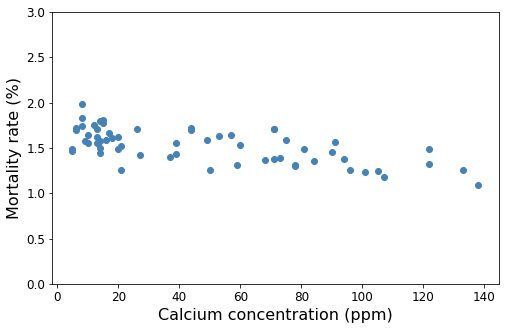

In [7]:
# Make a scatterplot of this data to see if you think there is some kind of trend.

# initialize the figure.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))

# Create a scatterplot with calcium as the independent variable and
# mortality rate as the dependent variable.
ax.scatter(dfMort["Calc"], dfMort["Rate"], color="steelblue")

# Make the graph pretty.
ax.set_ylim([0,3]);
plt.xticks(range(0,150,20), fontsize=12)
plt.yticks(np.linspace(0,3,7), fontsize=12);
ax.set_xlabel("Calcium concentration (ppm)", fontsize=16)
ax.set_ylabel("Mortality rate (%)", fontsize=16);

The scatterplot shows a slight downward trend, which suggests that higher concentrations of calcium lead to lower mortality rates. The question is whether this is really the case or if the slight downward trend should be attributed to chance.

**Part B**: Use the [stats.linregress](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html) dot-function to fit a linear regression model to the data of the form 

$$
Y_i = \alpha + \beta x_i + \epsilon_i, \quad \textrm{for } i=1,2, \ldots, 61 
$$

where $\epsilon \sim N(0,\sigma^2)$.

In addition to the estimates of the model parameters, report the values of $\color{red}{\text{pval}}$ and $\color{red}{\text{stderr}}$ returned by stats.linregress.  

In [8]:
# linregress will return 5 different bits of information
bhat1, ahat, rval, pval, stderr = stats.linregress(dfMort["Calc"], dfMort["Rate"])
  # bhat1 is slope. I am calling it bhat1 instead of bhat due to double use later on.
  # ahat is y-intercept
  # rval is correlation coefficient
  # pval is the p-value for slope
  # stderr is the standard error for slope CI
    
print("Fitted Model: Y = {:.5f} + {:.5f}x".format(ahat, bhat1))
print("p-value = {}".format(pval)) ## p value for slope
print("stderr = {}".format(stderr))
print("correlation coefficient = {}".format(rval))


Fitted Model: Y = 1.67636 + -0.00323x
p-value = 1.0331339260349469e-08
stderr = 0.00048472309461436853
correlation coefficient = -0.6548486232042466


The regression equation (line of best fit) is:   $\phantom{xxx}\hat{y} = \alpha + \beta x$

The slope is: $\phantom{xx}\beta = -0.003$.

The y-intercept is: $\phantom{xx}\alpha = 1.676$.

$r = -0.655$ which indicates a decreasing relationship. 


Recall:

$\phantom{xxx}r$, the correlation coefficient, measures the linear dependence between $x$ and $y$.

That is to say: $\phantom{x}r$, measures the linear correlation between $x$ and $y$.

**Part C**: $\color{blue}{\text{The p-value and standard error returned by `stats.linregress` are referring to}}$ $\color{blue}{\text{a t-test for the slope coefficient}}$ $\color{blue}{\beta}$.

Compute the estimated variance $\hat{\sigma}^2$ and the standard error $SE(\hat{\beta})$ directly in Python.

Verify that your computed value for the standard error matches that returned by `stats.linregress`. 

Solution:

$\hat{y}=\hat{a}+\hat{b}\cdot x$

$SSE = \sum{(y-\hat{y})^2}$

$\hat{\sigma^2} = \frac{SSE}{n-2}$

$SE_{\beta}=\sqrt{\frac{\hat{\sigma^2}}{\sum{(x-\bar{x})^2}}}$

In [9]:
# 'x' is the array holding the calcium levels.
x = dfMort["Calc"]

# 'y' is the array holding the mortality rates.
y = dfMort["Rate"]

# 'yhat' is the array calculated using the returns of linregress on 'x'.
yhat = ahat + bhat1*x

# 'SSE' is calculated using the 'yhat' just found above.
SSE = np.sum((y-yhat)**2)
print("SSE = ", SSE)

# Calculate and print out the sample variance.
varhat = SSE / (len(x)-2)
print("sig_hat^2 = ", varhat)

# Calculate and print out the standard error.
SEbeta = np.sqrt(varhat / np.sum((x-np.mean(x))**2))
print("SE(beta_hat) = ", SEbeta)
print("")
print("Recall that .linregress returned {:.5} for SE.".format(stderr))


SSE =  1.2069883389736051
sig_hat^2 =  0.020457429474128902
SE(beta_hat) =  0.0004847230946143687

Recall that .linregress returned 0.00048472 for SE.


**Part D**: Perform a hypothesis test at the $\alpha = 0.05$ significance level to determine if the $\color{red}{\text{observed relationship between calcium concentration and mortality rate is real}}$ by testing the hypotheses: 

$$
H_0: \beta = 0 \\
H_1: \beta \neq 0 
$$

Verify that your direct computations yield the same p-value returned by `stats.linregress`.

$\color{blue}{\text{Is there sufficient evidence to conclude that the observed relationship between}}$
$\color{blue}{\text{calcium concentration and mortality rate is real?}}$


Solution:

Recall the t-value is: $t_{\hat{\beta}}=\frac{\hat{\beta}-\beta}{\sqrt{\frac{\hat{\sigma^2}}{\sum{(x-\bar{x})^2}}}}$

In [10]:
# 'bhat' was returned by 'linregress'.
# We just calculated SEbeta 'by hand' above, or we could use stderr as 
#  returned by .linregress.
Tb = (bhat1 - 0)/SEbeta 
#Tb = (bhat1-0)/stderr

print("test statistic Tb = {}".format(Tb))

test statistic Tb = -6.655535174800645


Calculate the p-value by hand and compare it to that which was returned by .linregress:

Recall:  $\text{p-value} = 2\cdot \text{CDF}(t_{\hat{\beta}}, n-2)$

In [11]:
tpval = 2*(stats.t.cdf(Tb, df=len(x)-2))
print("p-value = {}".format(tpval))

p-value = 1.0331339260349543e-08


Compare our calculated p-value above to that returned by linregress.

Recall `linregress` returned:  p-value = 1.0331339260349543e-08

Since the p-value is less than $\alpha = 0.05$ we reject the null hypothesis and conclude that there is sufficient statistical evidence that $\beta \neq 0$ and the relationship between the feature and $\color{red}{\text{response is real}}$.

Adding calcium to the drinking water is correlated with lower mortality rates. And recall the slope was -0.003. So what?

Every additional unit of calcium added to the water results in a reduction of 0.003 units in mortality rate. Not a very strong affect.

### Exercise 2 - Variability of Slope in a Simple Linear Regression 
*** 

The function sim_data returns simulated data from the generative model $Y = 1 + 2x + \epsilon$ where $\epsilon \sim N(0, \sigma^2)$. In this exercise we'll look at the variability of the slope of the simple linear regression model fitted to realizations of the simulated data. 

In [12]:

# This function returns the x and y coordinates of 'n' amount of
#  points scattered about the line y=ax+b.
# sig^2 is the variance of the errors of points about the line.
def sim_data(n=20, sig=1, a=1, b=2):
    
    # 'x' is an array holding 'n' amount of values between 0 and 2.
    x = np.linspace(0,2,n)
    
    # 'eps' (short for epsilons) is an array of 'n' amount of
    #  random choices from a N(0, sig).
    eps = stats.norm.rvs(0, sig, size=n)
    
    # 'y' is an array holding the values of a line using 
    #  'a' and 'b' with the array's 'x' and 'eps'. A cloud of linear points.
    y = a + b*x + eps 
    
    # Two arrays are returned. They are the x and y coordinates of
    #  points that are found 'near' the line y=a+bx.
    return x, y 


**Part A**: Execute the following code to:

$\color{red}{\text{Sample}}$ from the generative model,

$\color{red}{\text{fit}}$ a simple linear regression model,

and $\color{red}{\text{plot}}$ the results. 

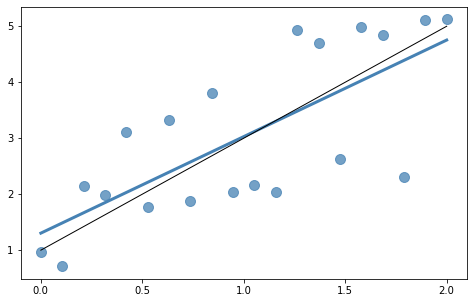

In [15]:
# 'sim_data' is our function from above that returns two arrays of values in 
#  a linear cloud.
x, y = sim_data(n=20, sig=1, a=1, b=2)

# Initialize the figure.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))

# Create a scatterplot of 'x' and 'y' to see the linear cloud.
ax.scatter(x, y, color="steelblue", alpha=0.75, s=100)

# Call stats.lingregress to get the 5 returns needed for a 
#  linear regression model that best fits the linear cloud, i.e. the arrays 'x' and 'y'.
bhat, ahat, rval, pval, stderr = stats.linregress(x, y)

# Plot (in blue) the regression line ('x' values, regression values),
# aka line of best fit for the data: (x, y = 1 + 2x +eps).
ax.plot(x, ahat + bhat*x, color="steelblue", lw=3);

# Plot (in black) the true straight line without the noise.
ax.plot(x, 1 + 2*x, color="black", lw=1)

# Make the graph pretty; plot tick marks.
plt.xticks(np.linspace(0,2,5));

**Part B**: Now do the same thing 50 times.

The following function computes $\color{red}{\text{50 independent realizations of the model data}}$ and computes and plots the resulting simple linear regression. Why?

$\color{blue}{\text{We're interested in how the parameter }}\color{blue}{\sigma} \color{blue}{\text{ in the generative model affects the variability of the **slope** of the}}$ 

$\color{blue}{\text{regression line}}$.  Experiment with several variances and describe the results. 

In [16]:
# This function graphs 50 regression lines from 50 samples.
def variability(n=20, sig=1):
    
    # Initialize the figure.
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    
    # This for-loop calls 'sim_data' 50 times to create 50 regression lines.
    for ii in range(50):
        
        # Get the two arrays, 'x' and 'y', from 'sim_data' with its 
        #  random eps (noise) included.
        x, y = sim_data(n=n, sig=sig, a=1, b=2)
        
        # Get the 5 returns from linregress for the 
        #  line of best fit for 'x' and 'y'.
        bhat, ahat, rval, pval, stderr = stats.linregress(x, y)
        
        # Create the regression line for this particular
        #  loop interation (recall this loop will iterate 50 times).
        yhat = ahat + bhat*x
        
        # Plot 'x' versus 'yhat', i.e. the regression line for
        #  this particular loop interation.
        ax.plot(x, yhat, color="steelblue", lw=2, alpha=0.2)
        
    # Make the graph pretty; add tickmarks.
    plt.xticks(np.linspace(0,2,5))


Now call the 'variability' function with a variety of sigma.

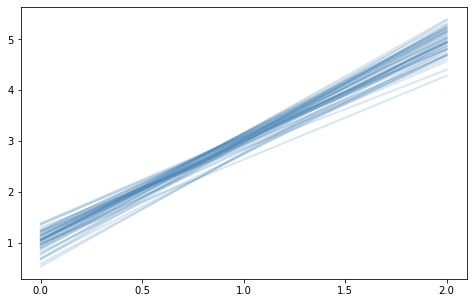

In [17]:
# How 'different' are the sample lines with this sig?
variability(n=20, sig=.5)

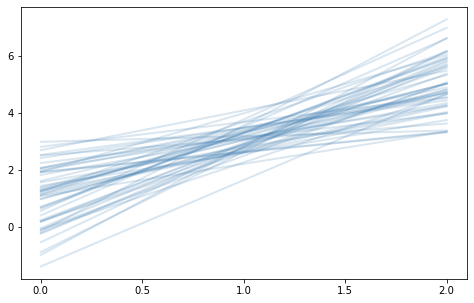

In [18]:
# How 'different' are the sample lines with this sig?
variability(n=20, sig=2)

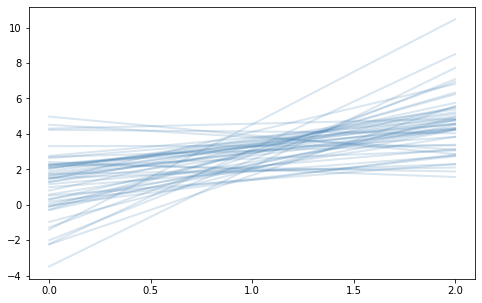

In [19]:
# How 'different' are the sample lines with this sig?
variability(n=20, sig=4)

Solution:

As the variance of the noise in the data increases, we see a great variation of slope in the independent samples that we are collecting. 

**Part C**: Do the same thing again, but this time collect the numerical slope of each line and put them in a histogram.

The following function computes 'num_samples' amount of independent realizations of the model data, computes the simple linear regression model, and generates a $\color{red}{\text{histogram}}$ of the resulting slopes.

Experiment with different variances for the generative model. What do you notice about the resulting histograms?

In other words, this is the same as above but we are looking at a histogram of each of the lines slopes rather than at the lines themselves.

In [22]:
# This function creates a histogram of 'num_samples' amount of
#  slopes for sample regression lines.
def slope_hist(n=20, sig=1, num_samples=500):
    
    # 'slopes' is an array of 'num_samples' amount of 0's.
    slopes = np.zeros(num_samples)
    
    # This for-loop collects the 'num_samples' amount of slopes.
    for ii in range(num_samples):
        
        # Generate the the arrays from our 'sim_data' function.
        # 'x' is an array of points from .linspace(0,2,n).
        # 'y' is the regression line with noise and slope bhat.
        # So, all of the (x,y)'s form a linear cloud of points.
        x, y = sim_data(n=n, sig=sig, a=1, b=2)
        
        # Call '.linregress' on 'x' and 'y'.
        bhat, ahat, rval, pval, stderr = stats.linregress(x, y)
        
        # add 'bhat' to our 'slopes' array.
        slopes[ii] = bhat 
        
    # Initialize the figure.    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    
    # Make a histogram out of 'slopes'.
    pd.Series(slopes).hist(ax=ax, color="steelblue", edgecolor="white", bins=15)
    
    # Make the graph pretty.
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    

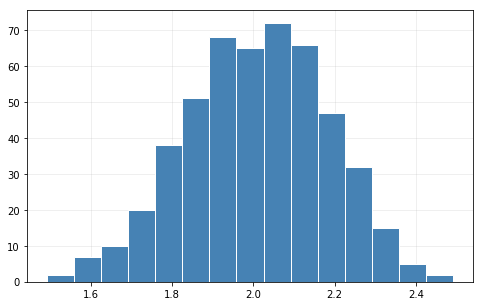

In [23]:
# Now, call our histogram generating function.
slope_hist(sig=.5)


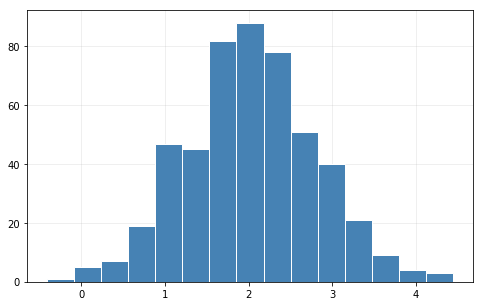

In [24]:
# Now, call our histogram generating function.
slope_hist(sig=2)

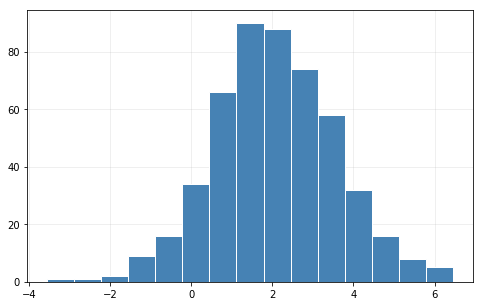

In [25]:
# Now, call our histogram generating function.
slope_hist(sig=4)

Solution:

As variance increases, the histogram becomes more 'spread out'. Each histogram indicates the slope is around 2 plus or minus a bit. And the 'bit' keeps getting larger.

The empirical distribution of the slopes appears to be roughly normally distributed. 

Recall:  $Y = 1 + 2x + \epsilon$ where $\color{red}{\epsilon \sim N(0, \sigma^2)}$.

**Part D**: Draw a single sample of size $n=20$ from sim_data with variance $\sigma^2 = 1$. Recall, 'sim_data' returns two arrays of values: 'x' is an array of values evenly spaced between 'a' and 'b', and 'y' is an array of noisy points about the line y=a+bx.

Use your sample to compute a 95% confidence interval for the slope.

Does the known slope from the model fall inside your confidence interval?

How does the variance $\sigma^2$ affect your 95% confidence interval?  In particular, how does changing $\sigma^2$ affect the CI width?

In [26]:
# Creat a random seed starting point to keep values consistent.
np.random.seed(1234)

# Call 'sim_data' for our two arrays of values; cloud of linear points.
x, y = sim_data(n=20, sig=.1)

# Call .linregress to get its 5 returns.
bhat, ahat, rval, pval, stderr = stats.linregress(x, y)

# The Lower CI level and the Upper CI level.
L_CI = (bhat - stats.t.ppf(0.975, len(x)-2) * stderr)
U_CI = (bhat + stats.t.ppf(0.975, len(x)-2) * stderr)

# Print out the CI.
print("95% CI = [{:.3f}, {:.3f}], CI width = {:.3f}".format(L_CI, U_CI, U_CI - L_CI))

# Alternative code for the same thing.
#CI = [bhat + flip * stats.t.ppf(0.975, len(x)-2) * stderr for flip in [-1,1]]
#print("95% CI = [{:.3f}, {:.3f}], CI width = {:.3f}".format(CI[0], CI[1], CI[1]-CI[0]))

95% CI = [1.904, 2.079], CI width = 0.175


Solution:

The known slope is 2, so we see it is within our CI.

Now, lets try a larger variance to see if the variance makes the interval width bigger.

In [27]:
# The same random seed as above. Did we need to put it again?
np.random.seed(1234)

# Get the arrays from 'sim_data'.
x, y = sim_data(n=20, sig=2)

# Get the 5 returns from 'linregress',
bhat, ahat, rval, pval, stderr = stats.linregress(x, y)

# Create and print the CI.
CI = [bhat + flip * stats.t.ppf(0.975, len(x)-2) * stderr for flip in [-1,1]]
print("95% CI = [{:.3f}, {:.3f}], CI width = {:.3f}".format(CI[0], CI[1], CI[1]-CI[0]))

95% CI = [0.073, 3.573], CI width = 3.500


Solution:

The CI is bigger and it still contains the known variance of 2. 

In [28]:
# An even bigger sig
np.random.seed(1234)
x, y = sim_data(n=20, sig=5)
bhat, ahat, rval, pval, stderr = stats.linregress(x, y)
CI = [bhat + flip * stats.t.ppf(0.975, len(x)-2) * stderr for flip in [-1,1]]
print("95% CI = [{:.3f}, {:.3f}], CI width = {:.3f}".format(CI[0], CI[1], CI[1]-CI[0]))

95% CI = [-2.818, 5.933], CI width = 8.751


Solution:

In each experiment, the 95% confidence interval covers the true variance.  As the variance in the data increases the width of the confidence interval increases. 

### Exercise 3 - The Coefficient of Determination and Goodness of Fit 
*** 

**Part A**: Complete the function R2 below to:

Per the usual, we will generate a $\color{red}{\text{sample}}$ from sim_data,

compute a simple $\color{red}{\text{linear regression}}$ using stats.linregress,

$\color{red}{\text{plot}}$ the resulting model and scatter plot,

and return the $\color{red}{R^2}$ value for the given fit.

***How does the choice of $\sigma^2$ affect the $R^2$ value?***

Solution:

Recall: How is $R^2$ evaluated?

$\phantom{xxx}\hat{y}=\hat{a}+\hat{b}\cdot x$

$\phantom{xxx}\text{SSE} = \sum{(y - \hat{y})^2}$

$\phantom{xxx}\text{SSR} = \sum{(\bar{y} - \hat{y})^2}$

$\phantom{xxx}\text{SST} = \sum{(\bar{y} - y)^2}$

$\phantom{xxx}R^2 = 1 - \frac{\text{SSE}}{\text{SST}}$

In [22]:
# This function will graph a regression line and return the R^2 value.
def R2_sim(n=40, sig=1):

    # Call 'sim_data' to create the 'x' and 'y' arrays.
    x, y = sim_data(n=40, sig=sig, a=1, b=2)
    
    # Initialize the figure.
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    
    # Create a scatter plot of 'x' and 'y'.
    ax.scatter(x, y, color="steelblue", alpha=0.75, s=100)
    
    # Generate the 5 returns from .linregress on 'x' and 'y'.
    bhat, ahat, rval, pval, stderr = stats.linregress(x, y)
    
    # Plot the regression line, i.e. the line of best fit.
    ax.plot(x, ahat + bhat*x, color="steelblue", lw=3);
    
    # Make the graph pretty
    plt.xticks(np.linspace(0,2,5));

    # Generate all the parts needed for calculating R^2 by hand.
    yhat = ahat + bhat*x 
    SSE  = np.sum((y-yhat)**2) 
    SSR  = np.sum((np.mean(y)-yhat)**2) 
    SST  = np.sum((np.mean(y)-y)**2) 
    R2 = 1 - SSE/SST 
    
    # Return the value of R^2 goodness-of-fit.
    return R2


0.9127733814640202

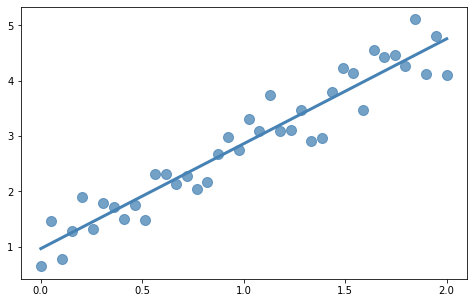

In [23]:
# Call the function for 40 points with variance 0.5.
R2_sim(n=40, sig=.5)


0.2270227143627498

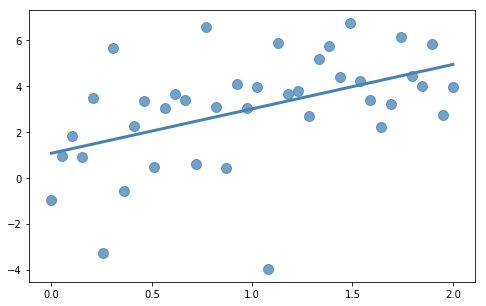

In [31]:
# Call the function with a bigger variance.
R2_sim(n=40, sig=2)
# Notice R^2 goes down.

0.12892626417517206

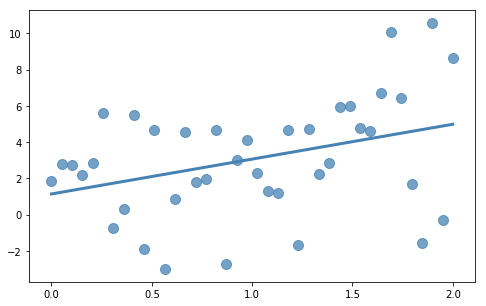

In [32]:
# Call the function for an even bigger variance.
R2_sim(n=40, sig=3)
# Notice R^2 goes down even more.

Solution:

We notice that as the variance of the model noise increases, the $R^2$ value decreases.

This makes sense because the $R^2$ value is a measure of the total variation in the data that is explained by the model. 

**Part B**: The $R^2$ value is actually reported (sorta) by stats.linregress through the rval quantity.  The relationship is $R^2 = (\textrm{rval})^2$.  Verify that your computed $R^2$ value above agrees with the value returned by stats.linregress. 

In [24]:
# This function merely verifies that one of the returns from
#  linregress can be massaged into R^2.
def R2_check(n=40, sig=1):
    
    # Call 'sim_data' to generate the arrays 'x' and 'y'.
    x, y = sim_data(n=40, sig=sig, a=1, b=2)
    
    # Create a scatterplot of 'x' and 'y'.
    ax.scatter(x, y, color="steelblue", alpha=0.75, s=100)
    
    # Generate the 5 returns from linregress on 'x' and 'y'.
    bhat, ahat, rval, pval, stderr = stats.linregress(x, y)

    # Create the values needed for generating R^2 'by hand'.
    yhat = ahat + bhat*x 
    SSE  = np.sum((y-yhat)**2) 
    SSR  = np.sum((np.mean(y)-yhat)**2) 
    SST  = np.sum((np.mean(y)-y)**2) 
    R2 = 1 - SSE/SST 
    
    # Compare your 'hand work' in creating R^2 to the value
    #  returned by linregress; rval^2.
    print("Computed R^2 value: {:.4f}".format(R2))
    print("LinRegress R^2 value: {:.4f}".format(rval**2))
    
    return 

In [34]:
# Call the function with a variance of 1.
R2_check(n=40, sig=1)
# Compare the values returned.

Computed R^2 value: 0.5694
LinRegress R^2 value: 0.5694


In [35]:
# Call the function with a bigger variance.
R2_check(n=40, sig=2)
# Compare the values returned.

Computed R^2 value: 0.6323
LinRegress R^2 value: 0.6323


In [36]:
# Call the function with an even bigger variance.
R2_check(n=40, sig=3)
# Compare the values returned.

Computed R^2 value: 0.0342
LinRegress R^2 value: 0.0342
